In [1]:
from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMasker
from src import god_dataset
import nibabel


/home/krutika/.virtualenvs/kdm-jupyter/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
god = god_dataset.create_god_dataset('./data')

Mask Addresses dict_keys(['sub-02', 'sub-05', 'sub-04', 'sub-01', 'sub-03'])
T1T2 Addresses dict_keys(['sub-02', 'sub-05', 'sub-04', '.', 'sub-01', 'sub-03'])
func Addresses dict_keys(['sub-02', 'sub-05', 'sub-04', 'sub-01', 'sub-03'])
func Addresses dict_keys(['sub-02', 'sub-05', 'sub-04', 'sub-01', 'sub-03'])


In [3]:
mask_filename = god_dataset.get_full_filename(god, "mask_addresses", "sub-05", "sub-05_mask_LH_FFA.nii")[0]
anat_filename = god_dataset.get_full_filename(god, "T1_T2_masks", "sub-05", "sub-05_ses-perceptionTraining01_inplaneT2.nii")[0]
anat_filename2 = god_dataset.get_full_filename(god, "T1_T2_masks", "sub-05", "sub-05_ses-anatomy_T1w.nii")[0]

func_filename = god_dataset.get_full_filename(god, "func_addresses", "sub-05", "sub-05_ses-perceptionTraining01_task-perception_run-01_bold.nii")[0]
print(mask_filename,anat_filename,func_filename, sep="\n")

./data/sourcedata/sub-05/anat/sub-05_mask_LH_FFA.nii.gz
./data/sub-05/ses-perceptionTraining01/anat/sub-05_ses-perceptionTraining01_inplaneT2.nii.gz
./data/sub-05/ses-perceptionTraining01/func/sub-05_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz


/home/krutika/.virtualenvs/kdm-jupyter/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


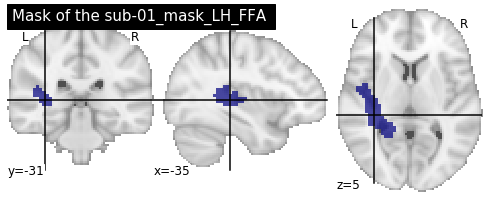

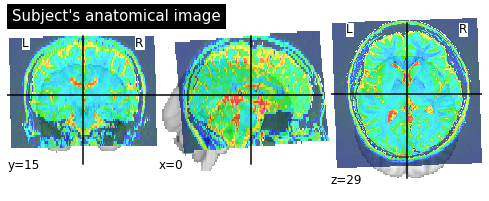

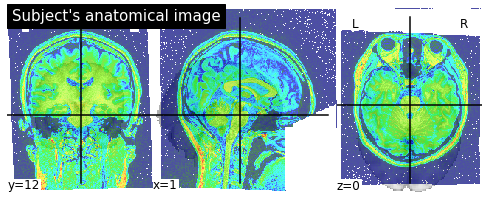

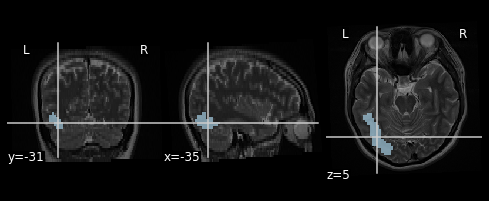

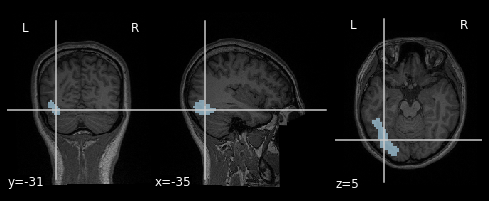

In [4]:
plotting.plot_roi(mask_filename,title="Mask of the sub-01_mask_LH_FFA ")
plotting.plot_roi(anat_filename, title="Subject's anatomical image")
plotting.plot_roi(anat_filename2, title="Subject's anatomical image")

plotting.plot_roi(mask_filename,bg_img=anat_filename, cmap="Paired")
plotting.plot_roi(mask_filename,bg_img=anat_filename2, cmap="Paired")

# plotting.plot_roi(mask_filename,bg_img=haxby_dataset.anat[0], cmap="Paired")

In [5]:
masker = NiftiMasker(mask_img=mask_filename, standardize=True)

# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(func_filename)
print(fmri_masked)

/home/krutika/.virtualenvs/kdm-jupyter/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[[ 0.71060133  0.3018449   0.64383423 ... -2.8702943  -2.2355473
   3.2524014 ]
 [ 0.16126408  1.6169468   1.3880146  ... -1.8035903  -2.5472612
   2.1674182 ]
 [-0.23502184  1.4270144   1.4428629  ... -2.1620102  -1.4742105
   2.07236   ]
 ...
 [ 0.98750484 -0.9916685  -0.98416835 ... -0.17385726  0.3144147
  -0.94263107]
 [ 0.41075525 -1.6899376  -0.88154227 ... -0.44664732  0.2605619
  -0.62401587]
 [ 1.7366809  -1.1582803  -1.847552   ...  0.23155804  1.6665459
   0.08062349]]


In [15]:
data = nibabel.load(func_filename).get_data()
mask = nibabel.load(mask_filename).get_data()
print(type(masker))
print(data.shape,fmri_masked.shape,mask.shape)


<class 'nilearn.input_data.nifti_masker.NiftiMasker'>
(64, 64, 50, 178) (178, 417) (64, 64, 50)


In [7]:
mask_filename = god_dataset.get_full_filename(god, "mask_addresses", "sub-01", "sub-01_mask_RH_hV4.nii")[0]
func_filename = god_dataset.get_full_filename(god, "func_addresses", "sub-01", "sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii")[0]
event_filename = god_dataset.get_full_filename(god, "event_addresses", "sub-01", "sub-01_ses-perceptionTraining01_task-perception_run-02_events.tsv")[0]

print(mask_filename,func_filename,event_filename, sep="\n")
fmri_masked = masker.fit_transform(func_filename)
print(fmri_masked.shape)

./data/sourcedata/sub-01/anat/sub-01_mask_RH_hV4.nii.gz
./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii.gz
./data/sub-01/ses-perceptionTraining01/func/sub-01:ses-perceptionTraining01:func:sub-01_ses-perceptionTraining01_task-perception_run-02_events.tsv


/home/krutika/.virtualenvs/kdm-jupyter/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


(178, 417)


In [8]:
import pandas as pd
# Load behavioral information
event_filename = god_dataset.get_full_filename(god, "event_addresses", "sub-01", "sub-01_ses-perceptionTraining01_task-perception_run-10_events.tsv")[0]
print(event_filename)
behavioral = pd.read_csv(event_filename, sep="\t")
print(behavioral)

./data/sub-01/ses-perceptionTraining01/func/sub-01:ses-perceptionTraining01:func:sub-01_ses-perceptionTraining01_task-perception_run-10_events.tsv
    onset  duration  trial_no event_type   stimulus_id    stimulus_name  \
0       0        33         1       rest           NaN              NaN   
1      33         9         2   stimulus  3.063599e+06   n03063599_3234   
2      42         9         3   stimulus  4.197391e+06  n04197391_18597   
3      51         9         4   stimulus  2.131653e+06   n02131653_7902   
4      60         9         5   stimulus  3.397947e+06   n03397947_4284   
5      69         9         6   stimulus  4.442441e+06   n04442441_6478   
6      78         9         7   stimulus  2.843158e+06   n02843158_5600   
7      87         9         8   stimulus  4.273569e+06  n04273569_17297   
8      96         9         9   stimulus  4.273569e+06  n04273569_17297   
9     105         9        10   stimulus  7.758680e+06  n07758680_15982   
10    114         9        1

In [9]:
import h5py
filename = './data/subjecth5files/Subject1.h5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
    dataset = f['dataSet']    

Keys: <KeysViewHDF5 ['callStack', 'callStackCode', 'createDate', 'createDateRaw', 'createScript', 'dataSet', 'metaData']>


In [10]:
data

[b'/home/mu/aoki/work/GenericObjectDecoding/code/python/data/conv_mat2h5.m:15']

In [11]:
dataset


<Closed HDF5 dataset>

In [17]:
import bdpy

In [20]:
dat = bdpy.BData('./data/subjecth5files/Subject1.h5')

In [22]:
rois = {'VC' : 'ROI_VC = 1',
        'LVC' : 'ROI_LVC = 1',
        'HVC' : 'ROI_HVC = 1',
        'V1' : 'ROI_V1 = 1',
        'V2' : 'ROI_V2 = 1',
        'V3' : 'ROI_V3 = 1',
        'V4' : 'ROI_V4 = 1',
        'LOC' : 'ROI_LOC = 1',
        'FFA' : 'ROI_FFA = 1',
        'PPA' : 'ROI_PPA = 1'}


x = dat.select(rois['VC'])
x = dat.select('ROI_VC = 1')           # Brain data
datatype = dat.select('DataType')   # Data type
labels = dat.select('stimulus_id')  # Image labels in brain data


TypeError: iteration over a 0-d array